In [8]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as plt 

from sklearn import preprocessing

In [4]:
#data 
data=pd.read_csv("StudentsPerformance.csv")


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
#dataclean
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
#drop unimportant col
data=data.drop(['test preparation course'],axis=1)

In [7]:
data

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,72,72,74
1,female,group C,some college,standard,69,90,88
2,female,group B,master's degree,standard,90,95,93
3,male,group A,associate's degree,free/reduced,47,57,44
4,male,group C,some college,standard,76,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,88,99,95
996,male,group C,high school,free/reduced,62,55,55
997,female,group C,high school,free/reduced,59,71,65
998,female,group D,some college,standard,68,78,77


In [22]:
#convert all obj data to num 
le=preprocessing.LabelEncoder()
data_object=data.select_dtypes(include=["object"])
for i in range(data_object.shape[1]):
    data_object.iloc[:,i]=le.fit_transform(data_object.iloc[:,i])

data_object

,gender,race/ethnicity,parental level of education,lunch
0,0,1,1,1
1,0,2,4,1
2,0,1,3,1
3,1,0,0,0
4,1,2,4,1
...,...,...,...,...
995,0,4,3,1
996,1,2,2,0
997,0,2,2,0
998,0,3,4,1


In [28]:
#conncet 
data_num=data.select_dtypes(exclude=['object'])
data=pd.concat([data_object,data_num],axis=1)


<AxesSubplot:>

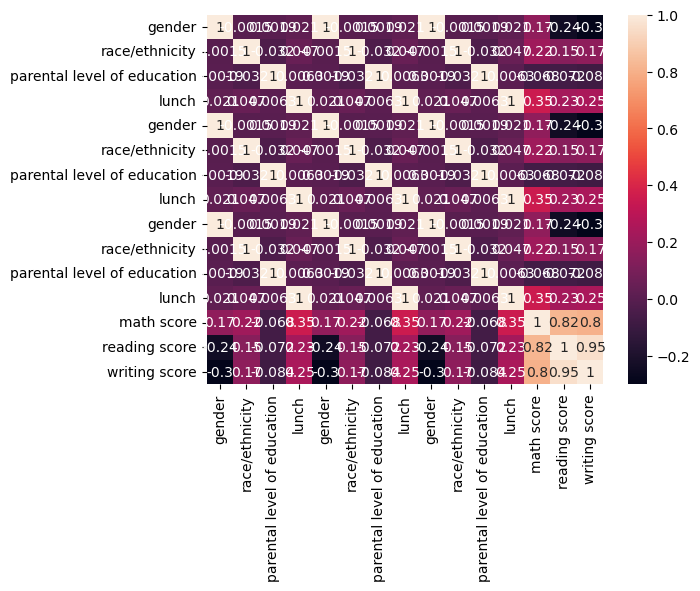

In [34]:
#datavisualize
c=data.corr()
sns.heatmap(c,annot=True)
